Dataset 1 column names and data types:
Impression ID                        int64
User ID                             object
Timestamp                           object
Displayed News List                 object
Impression List (Clicked Status)    object
Impression Dictionary               object
Clicked News IDs                    object
Not-Clicked News IDs                object
dtype: object

Dataset 2 column names and data types:
Impression ID                        int64
User ID                             object
Timestamp                           object
Displayed News List                 object
Impression List (Clicked Status)    object
Impression Dictionary               object
Clicked News IDs                    object
Not-Clicked News IDs                object
dtype: object
Intersection (common News IDs): {'N108043', 'N37119', 'N17146', 'N75300', 'N43428', 'N2679', 'N28684', 'N85044', 'N13775', 'N88978', 'N4324', 'N45969', 'N45147', 'N80673', 'N25116', 'N8760', 'N117675', 'N1

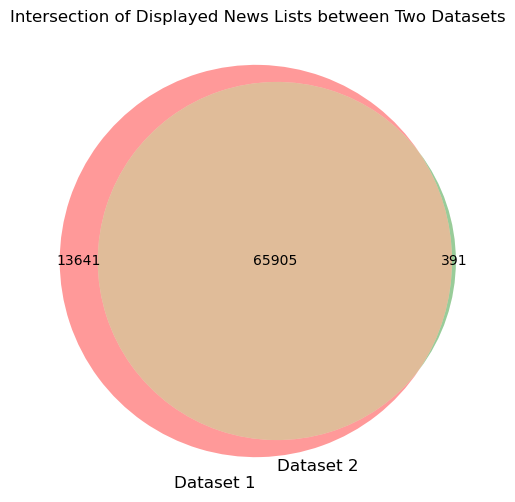

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Load the datasets
dataset1 = pd.read_csv('/Users/n7/Desktop/ie University SAMBD Acadamics/Capstone Project/Data/MINDlarge_train/Cleaned Datasets/cleaned_behavior_dataset.csv')
dataset2 = pd.read_csv('/Users/n7/Desktop/ie University SAMBD Acadamics/Capstone Project/Data/MINDlarge_dev/Cleaned Dataset/cleaned_behavior_dataset.csv')

# Print column names and data types for each dataset
print("Dataset 1 column names and data types:")
print(dataset1.dtypes)
print("\nDataset 2 column names and data types:")
print(dataset2.dtypes)

# Function to extract unique news IDs from each dataset's Displayed News List
def get_unique_news_ids(df, column_name):
    news_ids = set()
    for news_list in df[column_name].dropna():
        # Split by comma and add each ID to the set (ensures uniqueness)
        news_ids.update(news_list.split(','))
    return news_ids

# Get unique news IDs from Displayed News List columns
news_ids_1 = get_unique_news_ids(dataset1, 'Displayed News List')
news_ids_2 = get_unique_news_ids(dataset2, 'Displayed News List')

# Find intersection, unique in dataset1, and unique in dataset2
intersection = news_ids_1 & news_ids_2
unique_to_dataset1 = news_ids_1 - news_ids_2
unique_to_dataset2 = news_ids_2 - news_ids_1

# Print the differences and intersection
print("Intersection (common News IDs):", intersection)

# Plot the intersection as a Venn diagram
plt.figure(figsize=(8, 6))
venn2([news_ids_1, news_ids_2], set_labels=('Dataset 1', 'Dataset 2'))
plt.title("Intersection of Displayed News Lists between Two Datasets")
plt.show()
